# **Otimização e Florestas Aleatórias**

## **Bibliotecas**

In [ ]:
import os  # Módulo para interagir com o sistema operacional (manipular diretórios, arquivos, etc.)

import numpy as np  # Biblioteca fundamental para computação numérica com arrays e funções matemáticas

import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações

import pandas as pd  # Biblioteca para manipulação e análise de dados tabulares (DataFrames)

import seaborn as sns  # Biblioteca para visualização de dados baseada no matplotlib, com temas e paletas de cores aprimoradas

from IPython.display import display, Markdown  # Para exibir objetos em Jupyter Notebooks de forma interativa

from sklearn.datasets import load_iris  # Função para carregar o dataset Iris, clássico para classificação

from sklearn.model_selection import train_test_split, cross_validate  # Para dividir o dataset em treino e teste e realizar validação cruzada

from sklearn.tree import DecisionTreeClassifier  # Modelo de Árvore de Decisão para tarefas de classificação

from sklearn.tree import DecisionTreeRegressor  # Modelo de Árvore de Decisão para tarefas de regressão

from sklearn import datasets  # Submódulo para carregar diversos datasets de exemplo do scikit-learn

from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix  # Métricas para avaliar desempenho de modelos de classificação e regressão


## **Otimização de Hiperparâmetros**

### **Grid Search**

Depois de selecionar uma **lista de modelos promissores** de **Árvore de Decisão**, o próximo passo é realizar o **ajuste fino** (**fine-tuning**) para otimizar o desempenho.

#### 🔹 Ajuste Manual

Uma opção seria ajustar os **hiperparâmetros** manualmente, testando várias combinações até encontrar a melhor.  

➡️ No entanto, isso seria um **processo muito demorado** e **pouco eficiente**, já que há muitas combinações possíveis para experimentar.


#### 🔹 Grid Search com Scikit-Learn

Em vez disso, podemos usar a classe `GridSearchCV` do **Scikit-Learn**.  

✅ Ela automatiza a busca pelas melhores combinações de **hiperparâmetros**:  
- Você informa **quais hiperparâmetros** deseja ajustar.  
- Define **quais valores** quer testar para cada um.  

➡️ O `GridSearchCV` então realiza a **validação cruzada** para avaliar **todas as combinações possíveis** e identificar aquela que resulta no **melhor desempenho**.


In [ ]:
# ✅ Carregar e preparar o dataset Iris
iris = load_iris()  # Carrega o famoso conjunto de dados Iris diretamente do scikit-learn

# Selecionamos apenas duas das quatro features disponíveis para simplificar a análise e visualização
X = iris.data[:, [0, 1]]  # Usamos apenas as features nas posições 0 e 1 (comprimento e largura da sépala)

# Guardamos os nomes das features escolhidas para referência
feature_names = [iris.feature_names[0], iris.feature_names[1]]

# O alvo original possui três classes: Setosa (0), Versicolor (1) e Virginica (2)
y = iris.target  # Vetor com as classes originais

# ✅ Dividir o dataset em treino (90%) e teste (10%) com estratificação
# Aqui usamos train_test_split para dividir os dados em:
# - Conjunto de treino: 90% dos dados
# - Conjunto de teste: 10% dos dados
# O parâmetro stratify=y é essencial pois garante que a proporção entre as três classes
# será a mesma tanto no conjunto de treino quanto no de teste.
# Isso evita problemas como desbalanceamento após a divisão.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                  # Features e alvo original (multiclasse)
    test_size=0.1,        # 10% dos dados para teste
    random_state=42,      # Semente para garantir reprodutibilidade
    stratify=y            # Mantém a proporção de cada classe na divisão
)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo = DecisionTreeClassifier(random_state=42)

In [ ]:
# Definindo o grid de hiperparâmetros para ajuste fino da Árvore de Decisão

hiperparam_grid = [
    # 'criterion' define a função usada para medir a qualidade de uma divisão:
    # - 'gini': índice de Gini, padrão, mede impureza.
    # - 'entropy': usa a entropia da informação (teoria da informação).
    {'criterion': ['gini', 'entropy'],

    # 'max_depth' limita a profundidade máxima da árvore.
    # - Evita árvores muito profundas, que podem levar a overfitting.
    # - None: permite que a árvore cresça até esgotar as divisões possíveis.
    'max_depth': [3, 5, 10, None]},

    # 'min_samples_split' é o número mínimo de amostras necessárias para dividir um nó interno.
    # - Valores maiores evitam divisões baseadas em poucas amostras, reduzindo overfitting.
    {'min_samples_split': [2, 5, 10],

    # 'min_samples_leaf' é o número mínimo de amostras que um nó folha deve conter.
    # - Garante que folhas não sejam criadas com poucos exemplos.
    # - Valores maiores tornam a árvore mais "generalista".
    'min_samples_leaf': [1, 2, 4]}
]

In [ ]:
# Configurando o GridSearchCV para encontrar a melhor combinação de hiperparâmetros

# - modelo: instância do classificador (ex.: DecisionTreeClassifier) que será ajustada.
# - param_grid: dicionário com os hiperparâmetros e os valores previamente definidos para teste.
# - cv=5: validação cruzada com 5 subdivisões (folds).
#   → Cada combinação de hiperparâmetros será avaliada 5 vezes, com diferentes divisões dos dados.
# - scoring='accuracy': a métrica usada para avaliar a performance será a acurácia.
# - return_train_score=True: salva também as pontuações obtidas nos dados de treinamento, além das de validação.

grid_search = GridSearchCV(
    estimator=modelo,             # Modelo base a ser ajustado com diferentes hiperparâmetros
    param_grid=hiperparam_grid,   # Grid contendo os hiperparâmetros e valores que serão testados
    cv=5,                         # Validação cruzada com 5 folds
    scoring='accuracy',           # Critério de avaliação: acurácia
    return_train_score=True       # Armazena também os scores obtidos no conjunto de treino
)


#### 🎯 Explicação conceitual da estrutura `param_grid` com múltiplos dicionários:

O `param_grid` é uma **lista de dicionários**, onde cada dicionário representa um **subconjunto de combinações de hiperparâmetros** que serão testadas separadamente.

##### Como funciona a busca:

O Scikit-Learn irá **primeiro explorar todas as combinações possíveis** de hiperparâmetros dentro do **primeiro dicionário**:

- `'criterion'`: 2 valores (`'gini'` ou `'entropy'`).
- `'max_depth'`: 4 valores (`3`, `5`, `10`, ou `None`).

**Total de combinações no primeiro dicionário:**

2 × 4 = **8 combinações**

Depois, o Scikit-Learn explorará todas as combinações no **segundo dicionário**:

- `'min_samples_split'`: 3 valores (`2`, `5`, `10`).
- `'min_samples_leaf'`: 3 valores (`1`, `2`, `4`).

**Total de combinações no segundo dicionário:**

3 × 3 = **9 combinações**

✅ **Logo, o `GridSearchCV` irá testar no total:**

8 + 9 = **17 combinações de hiperparâmetros**


#### 🎯 Explicação detalhada da configuração do ``GridSearchCV()``:

- **`estimator`**: é o modelo de base que será ajustado com diferentes combinações de hiperparâmetros — neste caso, uma **Árvore de Decisão**.
  
- **`param_grid`**: define as combinações de hiperparâmetros que serão testadas.
  
  ➡️ O Scikit-Learn irá explorar **todas as combinações possíveis dentro de cada dicionário** do `param_grid`, mas **não mistura os dicionários entre si**.

- **`cv=5`**: significa que será utilizada a **validação cruzada com 5 folds**.
  
  ➡️ Para cada combinação de hiperparâmetros, o modelo será treinado e avaliado **5 vezes**, cada vez com uma divisão diferente dos dados.

- **`scoring='accuracy'`**: define que a **métrica de avaliação será a acurácia**, ou seja, a **proporção de previsões corretas feitas pelo modelo**.


##### Quantos modelos o `GridSearchCV` vai treinar?

Como explicado acima:

➡️ **17 combinações no total** (8 do primeiro dicionário + 9 do segundo).

➡️ **Cada combinação será avaliada com 5 folds**.

**Logo:**

17 × 5 = **85 rodadas de treinamento**

##### Dica sobre ajuste de hiperparâmetros:

Quando **não se tem ideia** de qual valor escolher para um hiperparâmetro, uma abordagem comum é testar valores em **escala logarítmica**, como potências de 10 (por exemplo: `0.01`, `0.1`, `1`, `10`, `100`).

➡️ Para buscas mais refinadas, pode-se usar **intervalos menores**.

➡️ O importante é **explorar um espaço representativo de possibilidades**.


##### Como funciona a busca com múltiplos dicionários no `param_grid`:

O `GridSearchCV` **não combina parâmetros de dicionários diferentes**.

1. Ele primeiro avalia **todas as combinações do primeiro dicionário**.
2. Depois, avalia **todas as combinações do segundo dicionário**.

---

***Exemplo:***

- No primeiro dicionário temos **3 valores de A** e **4 de B** → então são 3×4 = **12 combinações**.
- No segundo dicionário, temos **2 valores de C** e **3 de D** → então são 2×3 = **6 combinações**.

**Total de combinações a testar:**

12 + 6 = **18**.

**Cada combinação será avaliada com `cv` subdivisões**, por exemplo:

18 × 5 = **90 treinos**.

---

#### Resumo prático:

- `param_grid` aceita uma **lista de dicionários**.
- O Scikit-Learn irá fazer a busca **separada por cada dicionário**.
- O **número total de combinações** é a **soma das combinações de cada dicionário**.
- O **número total de treinamentos** é:



>Agora vamos para a aplicação do `fit()` do `GridSearchCV` no dataset Iris
>
>Após configurar o `GridSearchCV`, o próximo passo é **ajustá-lo aos dados de treinamento** usando o método `fit()`.

In [ ]:
grid_search.fit(X_train, y_train)

>Podemos visualizar os hiperparâmetros que geraram o melhor modelo (estimador):

In [ ]:
grid_search.best_params_

>Podemos visualizar também o melhor modelo (estimador) diretamente:

In [ ]:
grid_search.best_estimator_

>E também o score alcançado por esse melhor modelo:

In [ ]:
grid_search.best_score_

>##### **Explorando Cada Combinação Testada: Resultados Detalhados da Validação Cruzada**
>
>Quando realizamos uma busca por hiperparâmetros com `GridSearchCV`, o objetivo não é encontrar a melhor acurácia de um único teste, mas sim uma **acurácia média validada** que seja robusta. Para cada combinação de hiperparâmetros avaliada, o algoritmo executa uma **validação cruzada completa**. Isso significa que, se definimos `cv=5`, o modelo é treinado e avaliado cinco vezes com essa mesma configuração de parâmetros, gerando cinco pontuações de acurácia individuais.
>
>A **média dessas cinco acurácias** é o que chamamos de `mean_test_score`. É essa média — um indicador mais confiável da capacidade de generalização daquela combinação de hiperparâmetros — que o processo de busca utiliza para comparar e identificar as melhores configurações.
>
>Abaixo, você encontrará os **scores médios de teste** para cada uma das configurações avaliadas, demonstrando o desempenho consistente de cada conjunto de parâmetros.

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

### **Busca Aleatória (Randomized Search)**

A abordagem de busca em grade (*Grid Search*) funciona bem quando você está explorando relativamente poucas combinações de hiperparâmetros, como no exemplo que usamos. Porém, quando o espaço de busca dos hiperparâmetros é muito grande, geralmente é preferível usar o `RandomizedSearchCV`.

Essa classe pode ser usada de forma bem semelhante ao `GridSearchCV`, mas, ao invés de testar todas as combinações possíveis, ela avalia um número fixo de combinações aleatórias. Ou seja, em cada iteração, o `RandomizedSearchCV` seleciona um valor aleatório para cada hiperparâmetro.

Essa abordagem traz dois benefícios principais:

1. Se você permitir que a busca aleatória rode, por exemplo, 1.000 iterações, ela explorará 1.000 combinações diferentes de hiperparâmetros. Isso é muito mais abrangente do que o `GridSearchCV`, que testa um número fixo e menor de combinações.

2. Definindo o número de iterações, você tem mais controle sobre o orçamento computacional que deseja dedicar à busca pelos melhores hiperparâmetros.

No nosso caso, com o modelo de Árvore de Decisão e os hiperparâmetros que definimos, usar o `RandomizedSearchCV` pode ser interessante caso queira testar muitas combinações diferentes sem gastar tanto tempo quanto o `GridSearchCV` exigiria.

#### Como funciona o RandomizedSearchCV:

- Ele testa um número fixo (`n_iter`) de combinações aleatórias de hiperparâmetros em vez de todas as possíveis, como no `GridSearchCV`.
- Para isso, você deve informar um dicionário (`param_distributions`) com os hiperparâmetros que quer testar, podendo ser listas de valores ou distribuições estatísticas para amostragem.
- O número de iterações (`n_iter`) controla quantas combinações aleatórias serão avaliadas.
- A busca é feita via validação cruzada para garantir uma boa generalização.
- O melhor modelo, segundo a métrica escolhida, pode ser re-treinado com todos os dados para uso posterior.

---

#### Parâmetros principais para usar no nosso caso:

- `estimador`: o seu modelo de Árvore de Decisão (`DecisionTreeClassifier` ou `DecisionTreeRegressor`).
- `param_distributions`: um dicionário com os hiperparâmetros, por exemplo:

```python
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
```

Vamos lá!!!

>Vamos importar e criar o modelo:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Seu modelo base
dt = DecisionTreeClassifier(random_state=42)

>Vamos definir os ***HIPERPARÂMETROS:***

In [ ]:
# Dicionário dos hiperparâmetros para busca aleatória
hiperparam_distributions = {
    # 'criterion': define o critério para medir a qualidade da divisão nos nós da árvore.
    # Pode ser 'gini' (índice de Gini) ou 'entropy' (entropia da informação).
    'criterion': ['gini', 'entropy'],

    # 'max_depth': limita a profundidade máxima da árvore.
    # Valores menores ajudam a evitar overfitting, None permite crescimento ilimitado.
    'max_depth': [3, 5, 10, None],

    # 'min_samples_split': número mínimo de amostras necessárias para dividir um nó interno.
    # Valores maiores impedem divisões baseadas em poucas amostras, reduzindo overfitting.
    'min_samples_split': range(1, 21),

    # 'min_samples_leaf': número mínimo de amostras que um nó folha deve conter.
    # Evita criar folhas com poucas amostras, o que torna a árvore mais robusta.
    'min_samples_leaf': [1, 2, 4]
}

>Vamos configurar o **Random Search:**

In [ ]:
random_search = RandomizedSearchCV(
    estimator=dt,                # O modelo estimador a ser ajustado, aqui uma Árvore de Decisão (dt)
    param_distributions=hiperparam_distributions,  # Dicionário com as distribuições dos hiperparâmetros para amostragem aleatória
    n_iter=20,                 # Número de combinações aleatórias a serem testadas (iterações)
    scoring='accuracy',         # Métrica usada para avaliar o desempenho dos modelos durante a validação cruzada
    cv=5,                      # Número de folds para validação cruzada (5-fold cross-validation)
    random_state=42,            # Semente para garantir a reprodutibilidade da amostragem aleatória
    
    n_jobs=-1,                  # Utiliza todos os processadores disponíveis para paralelizar o processo
                               # Isso significa que o RandomizedSearchCV executará múltiplas avaliações
                               # em paralelo, aproveitando todos os núcleos do computador, 
                               # acelerando significativamente o tempo de execução, principalmente 
                               # em máquinas com múltiplos núcleos ou processadores.

    verbose=1                   # Define o nível de verbosidade da saída durante a execução
                               # verbose=1 mostra informações básicas sobre o progresso da busca,
                               # como quais combinações estão sendo testadas e quantas ainda faltam.
                               # Pode ser aumentado para níveis maiores para mais detalhes ou diminuído para
                               # menos mensagens.
)


#### 🎯 Explicação da quantidade de treinamentos no RandomizedSearchCV

No caso do **RandomizedSearchCV**, a lógica da quantidade de treinamentos é um pouco diferente do **GridSearchCV**, pois o Randomized Search **não testa todas as combinações possíveis**, mas sim um número fixo de amostras aleatórias dentro do espaço de hiperparâmetros definido.

##### Como funciona a busca no RandomizedSearchCV:

- Você define um **dicionário ou lista de distribuições/lists de hiperparâmetros** para o modelo.

- Em vez de testar todas as combinações possíveis, o `RandomizedSearchCV` **sorteia aleatoriamente** um número fixo (`n_iter`) de combinações para testar.

- Cada uma dessas combinações é avaliada usando validação cruzada.

##### Quantidade total de treinamentos:

- `n_iter`: número total de **combinações aleatórias** de hiperparâmetros que serão testadas.

- `cv`: número de folds da validação cruzada (quantas vezes cada combinação será avaliada).

**Fórmula para o total de treinamentos:**
$$
\text{Total de treinamentos}= n_{iter} \text{× cv}
$$

>Agora vamos treinar o modelo através do Random Search:

In [ ]:
# Ajustando o modelo
random_search.fit(X_train, y_train)

Podemos identificar o melhor modelo:

In [ ]:
# Melhor combinação encontrada
display(Markdown(f"""
- A melhor combinação de hiperparâmetros encontrada, com maior acurácia, foi: 
```json
{random_search.best_params_}
```

- Com acurácia igual a: {random_search.best_score_:.2f}
"""))

>Se quisermos, podemos visualizar todas combinações com seus respctivos scores:

In [ ]:
cvres = random_search.cv_results_

# Itera sobre os resultados e exibe cada combinação como Markdown
for i, (mean_score, params) in enumerate(zip(cvres["mean_test_score"], cvres["params"])):
    
    display(Markdown(f"""
### 📊 Combinação {i + 1}

- Acurácia Média: `{mean_score:.4f}`

- Parâmetros:
```json
{params}
```
"""))

### **Testando e Salvando o Melhor Modelo Ajustado**

In [ ]:
# Acessa o melhor modelo treinado
melhor_modelo = random_search.best_estimator_

# Faz previsões na amostra de teste
y_pred = melhor_modelo.predict(X_test)

Vamos importar uma função que gera um relatório com métricas de avaliação de modelos de classificação. Ele é amplamente usado para analisar o desempenho de classificadores em tarefas supervisionadas, seu nome é ``classification_report()``:

In [ ]:
from sklearn.metrics import classification_report

**Relatório de Classificação: `classification_report()`**

Função do scikit-learn para avaliar métricas de classificação em problemas de aprendizado supervisionado.

**Parâmetros Principais:**

| Parâmetro | Tipo | Descrição |
|-----------|------|-----------|
| `y_true` | array-like | Valores reais (ground truth) - Representa o eixo vertical na matriz de confusão |
| `y_pred` | array-like | Valores preditos pelo modelo - Representa o eixo horizontal na matriz de confusão |
| `labels` | array | (Opcional) Lista de classes a serem incluídas no relatório |
| `target_names` | array | (Opcional) Nomes amigáveis para as classes (na mesma ordem dos labels) |
| `sample_weight` | array | (Opcional) Pesos para cada amostra |
| `digits` | int | (Padrão=2) Número de casas decimais para formatação |
| `output_dict` | bool | (Padrão=False) Se True, retorna como dicionário |
| `zero_division` | str/float | (Padrão='warn') Como lidar com divisão por zero |

**Métricas Reportadas:**

O relatório apresenta 4 métricas fundamentais para cada classe:

1. **Precision (Precisão)**
   - Fórmula: $\dfrac{TP}{TP + FP}$
   - Interpretação: Capacidade do modelo de não classificar instâncias negativas como positivas

2. **Recall (Revocação/Sensibilidade)**
   - Fórmula: $\dfrac{TP}{TP + FN}$
   - Interpretação: Capacidade do modelo de encontrar todas as instâncias positivas

3. **F1-Score**
   - Fórmula: $2 \times \dfrac{precision \times recall}{precision + recall}$
   - Interpretação: Média harmônica entre precision e recall

4. **Support**
   - Interpretação: Número de ocorrências reais da classe no conjunto de dados

**Dicas de Interpretação**

1. **Macro avg**: Média aritmética simples das métricas por classe (todas classes tem igual peso)
2. **Weighted avg**: Média ponderada pelo support (número de exemplos) de cada classe
3. **Accuracy**:
    - Acurácia geral do modelo:
$$
\dfrac{TP + TN}{TOTAL}
$$

4. Para problemas desbalanceados, prefira observar o weighted avg ou métricas por classe
5. Quando `output_dict=True`, o retorno pode ser convertido diretamente para pandas DataFrame:

#### **Teste**

In [ ]:
# Cálculo das métricas
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Cálculo das métricas
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Formatação e exibição com Markdown
display(Markdown(f"""
### ✅ Resultados do Modelo na Amostra de Teste

#### **Acurácia**: `{acc:.4f}`

---

#### 📝 Relatório de Classificação

```json
{report}
```
---

#### 📊 Matriz de Confusão

```json
{conf_matrix}
```

"""))

#### **Salvando e Carregando Modelos com ``joblib``**

O ``joblib`` é uma das escolhas da comunidade de Machine Learning para **persistir** modelos treinados, especialmente aqueles do scikit-learn. **Persistir** um modelo significa salvá-lo em um arquivo para que você possa reutilizá-lo mais tarde, sem ter que treiná-lo novamente. Isso é crucial em ambientes de produção, onde o tempo de treinamento pode ser longo.

In [ ]:
import joblib

In [ ]:
# Salvar o modelo
joblib.dump(melhor_modelo, 'melhor_modelo.pkl')

# Depois, para carregar:
# melhor_modelo = joblib.load('melhor_modelo.pkl')

## **Florestas Aleatórias**

### **Ensemble Learning (Aprendizado por Assembleia/Agrupamento)**

Suponha que você faça uma pergunta complexa para milhares de pessoas aleatórias e, em seguida, agregue as respostas delas. Em muitos casos, essa resposta agregada será melhor do que a resposta de um especialista. Isso é conhecido como **sabedoria da multidão**.

Da mesma forma, quando você agrega as previsões de vários modelos preditores (como classificadores ou regressores), frequentemente obtém previsões melhores do que se usasse apenas o melhor modelo individualmente. Um grupo de preditores é chamado de **ensemble**; por isso, essa técnica é conhecida como **Aprendizado em Conjunto** (*Ensemble Learning*), e um algoritmo que implementa essa técnica é chamado de **método de Ensemble**.

Por exemplo, é possível treinar vários classificadores de **Árvores de Decisão**, cada um utilizando um subconjunto aleatório diferente do conjunto de treinamento. Para fazer previsões, você coleta as previsões de todas as árvores individuais e então escolhe a classe que recebeu mais votos. Esse conjunto de Árvores de Decisão é chamado de **Floresta Aleatória** (*Random Forest*), e apesar de sua simplicidade, é um dos algoritmos de **Machine Learning** mais poderosos atualmente.


### **Classificadores por Votação: o gancho para Bagging**

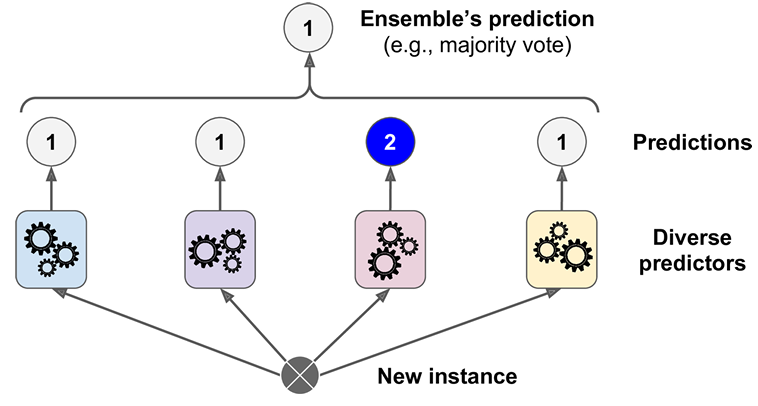

Imagine que você treinou diversos classificadores, cada um com cerca de **80% de acurácia** — por exemplo, uma Regressão Logística, uma SVM, uma Floresta Aleatória e um K-Nearest Neighbors. 

Uma maneira simples de criar um classificador ainda melhor é **agregar as previsões** de cada modelo e escolher a classe que receber a **maioria dos votos**. Esse modelo é chamado de **classificador por votação rígida** (*hard voting classifier*).

Surpreendentemente, essa abordagem pode alcançar uma **acurácia superior** à de qualquer classificador individual. Mesmo que cada modelo seja apenas **um pouco melhor que o acaso**, quando combinados e desde que sejam **suficientemente diversos**, o ensemble pode se tornar um **forte preditor**.

Essa ideia se apoia na **Lei dos Grandes Números**, um princípio fundamental da Estatística. Ele afirma que, à medida que realizamos um número cada vez maior de experimentos independentes, a média dos resultados tende a se aproximar da probabilidade real.

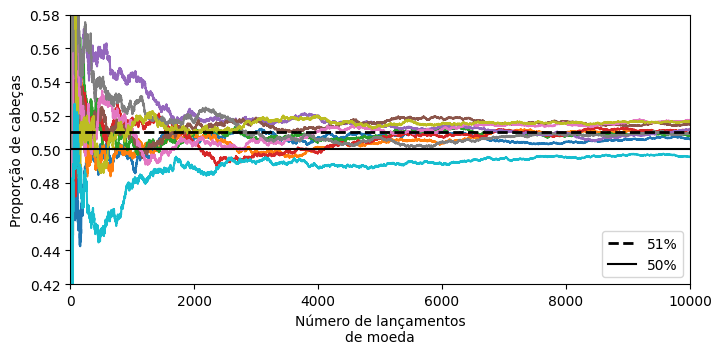

No contexto de ensembles, pense em cada classificador como uma **moeda levemente viciada**, com uma chance um pouco maior que 51% de acertar. Isoladamente, eles são apenas **aprendizes fracos** — fazem previsões um pouco melhores que o puro acaso. Mas, quando combinamos muitas dessas previsões através do **voto da maioria**, conseguimos um **resultado global muito mais confiável**.

Por exemplo, se tivermos 1.000 classificadores, cada um acertando apenas **51% das vezes**, ao combinar suas previsões pela maioria de votos, podemos atingir uma **acurácia superior a 75%**. Esse ganho ocorre porque os erros de cada classificador tendem a se **compensar** mutuamente, desde que sejam suficientemente **independentes**.

Assim como em repetidos lançamentos de uma moeda viciada, onde a proporção de caras se aproxima da probabilidade real conforme o número de lançamentos cresce, o mesmo acontece com classificadores: **quanto mais previsores, maior a estabilidade e a precisão do ensemble**.

In [ ]:
from sklearn.datasets import make_moons # Importa a função make_moons do módulo datasets da biblioteca scikit-learn
                                       # Essa função é usada para gerar um dataset sintético (artificial)
                                       # que se assemelha a duas "luas" interligadas ou meias-luas.
                                       # É um dataset muito popular para testar algoritmos de classificação
                                       # não-lineares, pois as classes não são linearmente separáveis.

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression # Importa o classificador de Regressão Logística
from sklearn.ensemble import RandomForestClassifier # Importa o classificador RandomForest (Floresta Aleatória)
from sklearn.svm import SVC                         # Importa o classificador Support Vector Machine (Máquina de Vetor de Suporte)

from sklearn.ensemble import VotingClassifier # Importa o classificador de Votação (VotingClassifier)

In [ ]:
# Inicializa um classificador de Regressão Logística.
# LogisticRegression é um modelo linear simples, mas eficaz, para problemas de classificação.
# solver="lbfgs": Define o algoritmo a ser usado para otimização, ou seja, como o modelo
#                  irá "aprender" e ajustar seus pesos para minimizar o erro (função de custo).
#                  O "lbfgs" (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) é um algoritmo
#                  da família dos métodos quase-Newton, que é eficiente e robusto para muitos
#                  datasets, especialmente quando o dataset não é muito grande. Ele tenta
#                  encontrar o mínimo da função de custo de forma iterativa, aproximando
#                  a segunda derivada (Hessiana) para determinar a direção de ajuste dos pesos.
#                  É um bom padrão e geralmente funciona bem para a maioria dos datasets.
# random_state=42: Garante que os resultados sejam reproduzíveis.
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
# random_state=42: Garante que os resultados sejam reproduzíveis. Se você rodar o código
#                  várias vezes, com o mesmo random_state, obterá sempre os mesmos resultados.
log_clf = LogisticRegression(solver="lbfgs", random_state=42)

# Inicializa um classificador RandomForest.
# RandomForestClassifier é um algoritmo de ensemble (conjunto) que constrói múltiplas
# árvores de decisão durante o treinamento e gera a classe que é a moda (a mais comum)
# das classes previstas pelas árvores individuais. É robusto e geralmente performa bem.
# n_estimators=100: Define o número de árvores de decisão na floresta. Mais árvores
#                   geralmente resultam em maior precisão, mas aumentam o tempo de treinamento.
# random_state=42: Garante a reprodutibilidade dos resultados da floresta aleatória.
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Inicializa um classificador Support Vector Machine (SVM).
# SVC é um algoritmo poderoso para classificação, que busca encontrar o hiperplano
# ideal que melhor separa as classes no espaço de features.
# gamma="scale": Define como o kernel (função que mapeia os dados para um espaço de dimensão superior)
#                impacta as amostras de treinamento. "scale" usa 1 / (n_features * X.var()),
#                o que é um bom padrão e automático para a maioria dos casos.
# random_state=42: Garante a reprodutibilidade dos resultados para o SVM.
svm_clf = SVC(gamma="scale", random_state=42)

In [ ]:
# estimators: É uma lista de tuplas, onde cada tupla contém:
#             - um nome curto (string) para o classificador (ex: 'lr' para Logistic Regression).
#             - a instância do classificador já inicializada (ex: log_clf).
#             Esses classificadores individuais serão treinados e suas previsões combinadas.
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
#
# voting: Define a estratégia de votação usada para combinar as previsões dos classificadores base.
#         Existem duas opções principais:
#         - 'hard' (Votação Rígida/Majoritária): O VotingClassifier prevê a classe que recebe
#           o maior número de votos da maioria dos classificadores individuais. Por exemplo,
#           se três classificadores preveem [0, 0, 1], a previsão final será 0.
#           É mais simples e exige que os classificadores retornem rótulos de classe discretos.
#         - 'soft' (Votação Suave/Ponderada): Se os classificadores base puderem estimar
#           probabilidades de classe (método predict_proba), o VotingClassifier soma as
#           probabilidades previstas para cada classe por todos os classificadores e prevê
#           a classe com a maior probabilidade média (ou ponderada). Isso geralmente
#           resulta em um desempenho melhor, pois considera a confiança de cada classificador.
#           Para 'soft' voting, os estimadores devem ter o atributo 'predict_proba'.
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

- ➡️ **Importante:** métodos de ensemble funcionam melhor quando os classificadores são o mais **independentes** possível, ou seja, cometem **erros diferentes**.

Esse conceito nos leva naturalmente ao estudo de técnicas mais sofisticadas de combinação de modelos, como o **Bagging** (*Bootstrap Aggregating*), onde múltiplos classificadores são treinados em **subconjuntos aleatórios dos dados** para reduzir a variância e melhorar o desempenho.

### **Bagging (Bootstrap Aggregating)**

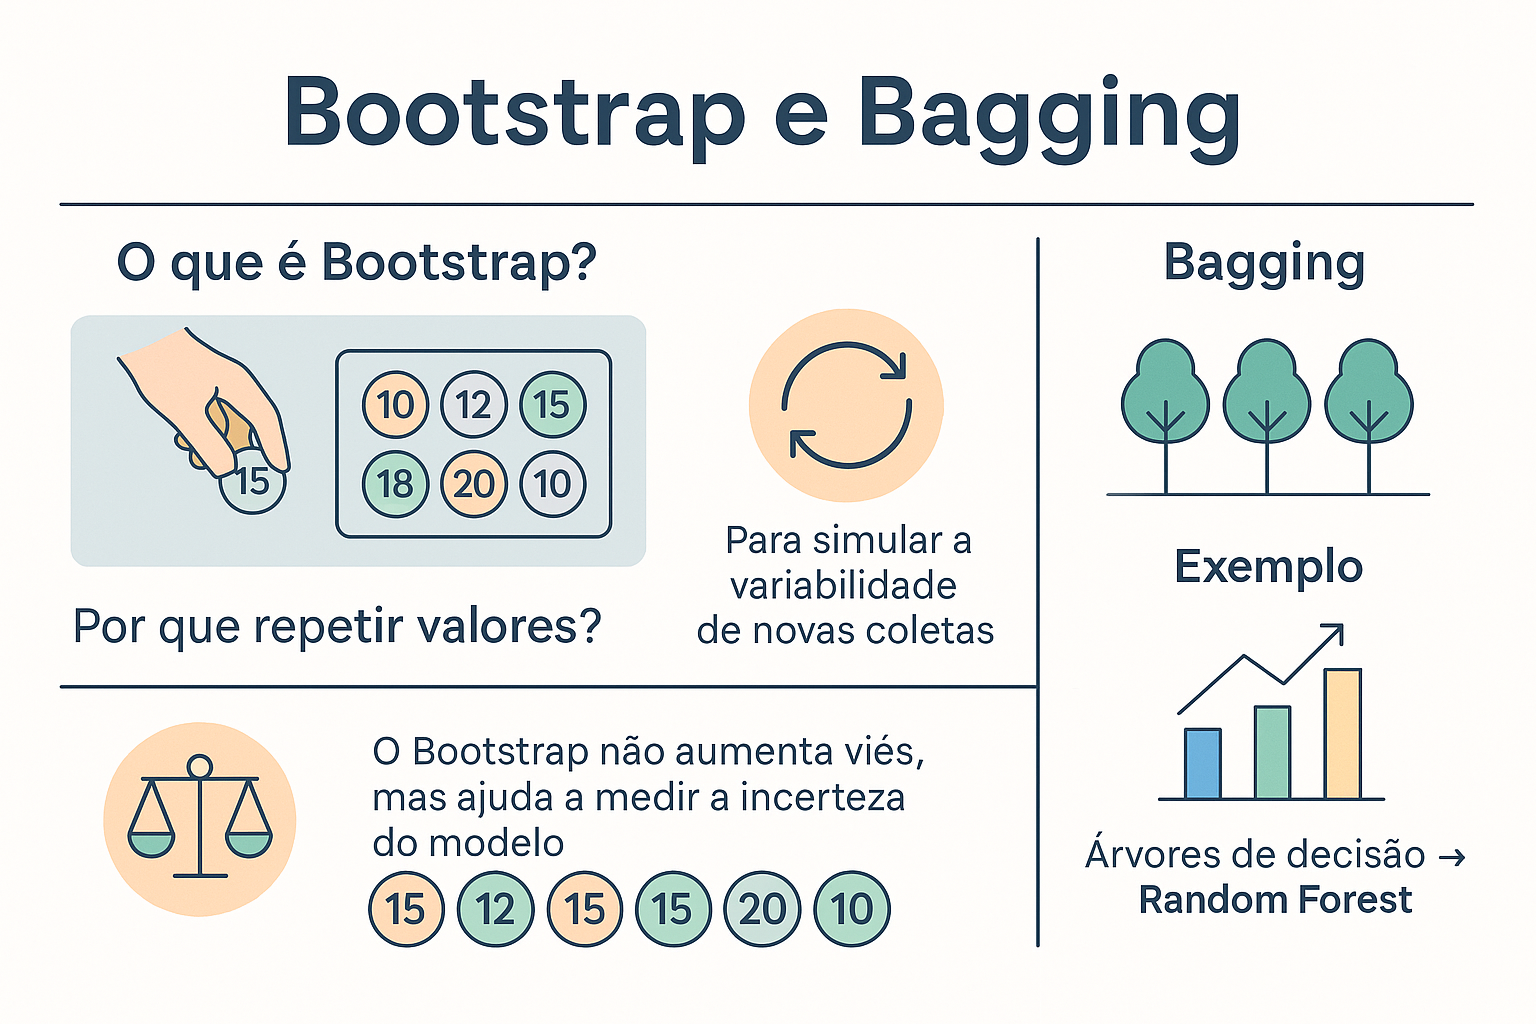

Segundo **[Breiman (1996)](https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1996-ML-Breiman-Bagging%20Predictors.pdf)**, O Bootstrap cria **replicações do conjunto de aprendizado** ao amostrar com reposição, simulando o que aconteceria ao coletarmos novos conjuntos da mesma distribuição.

Imagine que você tem um conjunto de dados de tamanho `N`. O Bootstrap consiste em criar novos conjuntos de dados, chamados de **amostras bootstrap**, pegando `N` elementos aleatórios do conjunto original, **com a possibilidade de repetir elementos**.

➡️ Isso significa que:  
- Alguns elementos podem aparecer mais de uma vez na mesma amostra.  
- Outros podem não aparecer.

**Exemplo:**  
Se o conjunto original tem 5 elementos: `{A, B, C, D, E}`, uma amostra bootstrap poderia ser: `{B, D, D, A, E}`.

Esse processo é repetido muitas vezes, criando várias amostras bootstrap. Cada uma delas é usada para **treinar um modelo diferente**.

**Resumo visual:**  
Conjunto original → várias amostras com reposição → vários modelos.

**Curiosidade importante:**  
Quando fazemos uma amostra bootstrap com tamanho `N`, aproximadamente **37%** dos elementos do conjunto original **não aparecem** nessa amostra.  
Isso ocorre porque a chance de um elemento não ser escolhido é aproximadamente `1/e ≈ 0.37`.

---

#### Bagging — como o Bootstrap é usado para melhorar modelos

**Bagging** é a sigla para "**Bootstrap Aggregating**", ou seja, **Agregação via Bootstrap**.

A ideia do Bagging é usar o Bootstrap para criar várias amostras, treinar vários modelos, e depois **combinar esses modelos** para fazer uma previsão **mais robusta**.

**Passos do Bagging:**  
1. Criar várias amostras bootstrap a partir do conjunto de dados original.  
2. Treinar um modelo em cada amostra.  
3. Quando for fazer uma previsão, **combinar as previsões** de todos os modelos.

➡️ **Como combinar?**  
- Problema de **regressão**: tirar a **média** das previsões.  
- Problema de **classificação**: fazer uma **votação** e escolher a classe mais votada.

**Resumo visual:**  
Várias amostras → vários modelos → agregação (média ou votação).

---

#### Por que o Bagging funciona?

O Bagging melhora os resultados principalmente quando o modelo que estamos usando é **instável**.

➡️ **O que é um modelo instável?**  
É um modelo que, se você mudar um pouco os dados de treinamento, ele muda bastante suas previsões.

**Exemplos de modelos instáveis:**  
- Árvores de decisão  
- Redes neurais  
- Seleção de variáveis na regressão  

**Exemplos de modelos estáveis:**  
- K-vizinhos mais próximos (KNN)

✅ Bagging funciona muito bem com modelos instáveis → **melhora a precisão**.  
❌ Bagging não melhora (ou pode até piorar) modelos estáveis.

➡️ **Por que melhora?**  
Ao treinar vários modelos em amostras ligeiramente diferentes, os **erros de cada um tendem a se compensar** quando combinamos.  
Isso reduz a **variância** do modelo e torna a previsão **mais confiável**.

---

#### Exemplo clássico: Árvores de decisão com Bagging

- Com uma única árvore: uma pequena mudança nos dados pode mudar muito a árvore.  
- Com Bagging: várias árvores treinadas em diferentes amostras → combinação das previsões → resultado **mais estável e preciso**.

➡️ Assim nasceu o **Random Forest**:  
Bagging de várias árvores de decisão, com algumas melhorias adicionais.

---

#### ✅ **Duvidas que podem surgir**: “Por que repetir valores? Não vai enviesar?”  

Parece contraintuitivo, mas **não é um problema**.

➡️ O objetivo do Bootstrap não é aumentar a variabilidade dos dados, mas entender como o modelo se comporta quando os dados mudam um pouco.

Repetir valores cria **variações artificiais** da amostra, simulando o que aconteceria se coletássemos novas amostras.

➡️ O Bootstrap ajuda a medir:  
- Como o modelo se altera quando os dados mudam.  
- A variabilidade ou estabilidade do modelo.

**Sobre enviesar:**  
O Bootstrap **não aumenta o viés**; ele é usado para **estimar incerteza** (como variância e intervalo de confiança).  
O viés vem da escolha da técnica e dos dados originais, não do Bootstrap.

**Dado interessante:**  
Mesmo com essa amostragem com reposição, cerca de **37%** dos dados da amostra original **não aparecem** em cada amostra bootstrap.

---

#### ✅ Por fim: qual o benefício?

Quando usamos **Bagging** (Bootstrap + Agregação), como no **Random Forest**, essa reamostragem e repetição ajudam a **reduzir a variância** do modelo e melhorar a **generalização**.

➡️ Para modelos **instáveis**, como árvores de decisão, isso é **muito poderoso**.

---

#### ✅ Exemplo prático:

Amostra original: `[10, 12, 15, 18, 20]` → `n = 5`

**Etapa 1 — Criando uma amostra Bootstrap:**  
- Sorteio 1: 15  
- Sorteio 2: 12  
- Sorteio 3: 15 (repetido)  
- Sorteio 4: 20  
- Sorteio 5: 10  

Nova amostra bootstrap: `[15, 12, 15, 20, 10]`  

✅ Repetimos o 15  
✅ Não pegamos o 18

➡️ **Isso é normal e esperado no Bootstrap!**

---

**Etapa 2 — Por que repetir?**  
Para criar várias versões da nossa amostra, como se tivéssemos coletado várias vezes, simulando a **incerteza natural**.

---

**Etapa 3 — Isso não vai enviesar?**  
Não!  
- O Bootstrap **não serve** para mudar os dados ou o modelo, mas para medir a **incerteza**.  
- O viés vem da técnica ou dos dados originais.

---

**Etapa 4 — E a variabilidade?**  
Mesmo com repetições, há variabilidade suficiente.

➡️ Em cada amostra bootstrap, cerca de **37% dos dados ficam de fora**.

**Exemplo:**  
Bootstrap 1: falta o 18  
Bootstrap 2: falta o 10 e o 12  
Bootstrap 3: falta o 20

Essa diversidade entre as amostras é essencial para:  
✅ Testar a **robustez** do modelo  
✅ Construir **intervalos de confiança**  
✅ Estimar a **variabilidade** da estatística

---

#### ✅ Resumindo a ideia com este fluxograma mental:

1. Só tenho uma amostra → preciso gerar outras para simular coletas.  
2. Faço Bootstrap → reamostro com reposição → gera amostras ligeiramente diferentes.  
3. Repetições ocorrem? → Sim, mas isso é bom → cria variações que simulam novas coletas.  
4. Vai enviesar? → Não!  
   - O viés está no modelo ou na amostra original.  
   - O Bootstrap ajuda a avaliar a **incerteza**.  
5. Variabilidade suficiente? → Sim!  
   - Porque, em média, **37% dos dados não aparecem** em cada amostra bootstrap → isso gera diversidade.

---

#### ✅ Conclusão:

- **Bootstrap** → técnica de reamostragem com reposição → cria novas amostras para estimar a **incerteza**.  
- **Bagging** → usa o Bootstrap para gerar vários modelos e combinar → reduz a **variância** e melhora a **precisão**.

➡️ Essencial para modelos **instáveis**, como **árvores de decisão** → exemplo clássico: **Random Forest**.


### **Bagging no ``Sckit-Learn``**

O Scikit-Learn oferece uma API simples para **bagging** através da classe `BaggingClassifier` (ou `BaggingRegressor` para problemas de regressão).

O código a seguir, por exemplo, treina um *ensemble* de 500 classificadores de Árvore de Decisão. Cada um desses classificadores é treinado em 100 instâncias de treinamento, que são amostradas aleatoriamente do conjunto de treinamento **com reposição**. Este é um exemplo clássico de **bagging**. Se você preferir usar **pasting** (amostragem sem reposição), basta definir o parâmetro `bootstrap=False`.

O parâmetro `n_jobs` indica ao Scikit-Learn o número de núcleos da CPU a serem utilizados para o treinamento e as previsões. Definir `n_jobs=-1` instrui o Scikit-Learn a usar todos os núcleos disponíveis.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Criação de um BaggingClassifier
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),  # Estimador base: uma árvore de decisão
    n_estimators=500,                         # Número de estimadores: 500 árvores serão treinadas
    max_samples=100,                          # Cada árvore será treinada com uma amostra aleatória de 100 observações (com reposição)
    bootstrap=True,                           # Amostragem com reposição (bootstrap), fundamental para o método Bagging
    random_state=42                           # Semente para reprodutibilidade dos resultados
)

# Treinamento do modelo Bagging com os dados de treinamento
bag_clf.fit(X_train, y_train)

# Predição usando o modelo treinado nos dados de teste
y_pred = bag_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

>Vamos fazer uma árvore de decisão para comparar:

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

>**Faremos um gráfico para comparar:**

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Árvores de Decisão", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Árvores de Decisão com Bagging", fontsize=14)
plt.ylabel("")
plt.show()

### **Random Forests**

Como já discutimos, uma **Random Forest** é um *ensemble* (conjunto) de **Árvores de Decisão**, geralmente treinadas usando o método **bagging** (ou, em alguns casos, **pasting**). Normalmente, o parâmetro `max_samples` é definido para o tamanho total do conjunto de treinamento.

Em vez de construir um `BaggingClassifier` e passar-lhe um `DecisionTreeClassifier`, você pode, de forma mais conveniente e otimizada, usar a classe **`RandomForestClassifier`** diretamente (de maneira similar, existe a classe `RandomForestRegressor` para tarefas de regressão).

O código a seguir, por exemplo, utiliza todos os núcleos de CPU disponíveis para treinar um classificador Random Forest com 500 árvores. Cada uma dessas árvores é limitada a um máximo de 16 nós, o que ajuda a controlar a complexidade e evitar o *overfitting*.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Criação de um RandomForestClassifier
rnd_clf = RandomForestClassifier(
    n_estimators=500,      # Número de árvores de decisão na floresta. Mais árvores podem reduzir o overfitting, mas aumentam o custo computacional.
    max_leaf_nodes=16,     # Número máximo de folhas em cada árvore, controlando a complexidade e ajudando a evitar overfitting.
    random_state=42        # Semente para garantir reprodutibilidade dos resultados.
)

# Treinamento do modelo Random Forest com os dados de treinamento
y_pred_rf = rnd_clf.fit(X_train, y_train)

In [ ]:
y_pred_rf

#### Hiperparâmetros da Random Forest

Com algumas poucas exceções, um `RandomForestClassifier` possui **todos os hiperparâmetros de um `DecisionTreeClassifier`** (que controlam como as árvores individuais são construídas) **mais todos os hiperparâmetros de um `BaggingClassifier`** (que controlam o *ensemble* como um todo).

#### Aleatoriedade Adicional em Random Forests

O algoritmo Random Forest introduz uma **aleatoriedade adicional** no processo de crescimento das árvores. Em vez de procurar pela **melhor** característica entre **todas** as características disponíveis ao dividir um nó (como acontece em uma Árvore de Decisão padrão), ele busca a melhor característica apenas dentro de um **subconjunto aleatório de características**.

##### Árvore de Decisão Padrão: A Busca Exaustiva

Imagine que você tem um conjunto de dados com **100 características** (colunas). Quando uma **Árvore de Decisão padrão** precisa dividir um nó (ou seja, decidir qual "pergunta" fazer para separar os dados da melhor forma), ela faz o seguinte:

* **Avalia CADA uma das 100 características.** Para cada característica, ela testa diferentes pontos de corte (se a característica é numérica) ou categorias (se é categórica).
* **Calcula a "qualidade" de cada possível divisão.** Essa "qualidade" é medida por critérios como `gini` (impureza Gini) ou `entropy` (ganho de informação), que indicam o quão bem a divisão separa as classes.
* **Escolhe a característica e o ponto de corte que resultam na MELHOR divisão.** Ela busca exaustivamente a melhor opção entre todas as 100 características.

Essa busca exaustiva é eficiente para uma única árvore, mas pode levar a árvores muito **correlacionadas** quando usadas em um *ensemble*. Se muitas árvores veem os mesmos dados e buscam a "melhor" característica sempre, elas tendem a tomar decisões muito parecidas, o que limita a diversidade do *ensemble*.

---

##### Random Forest: A Busca com Aleatoriedade Extra

É aqui que a **Random Forest** introduz sua aleatoriedade e sua genialidade. Em vez de avaliar todas as 100 características, quando uma árvore em uma Random Forest vai dividir um nó:

* **Ela seleciona aleatoriamente um *subconjunto* de características.** Por exemplo, se você tem 100 características, a Random Forest pode ser configurada para considerar apenas 10 características aleatórias para cada divisão. **Importante:** Essas 10 características são escolhidas *aleatoriamente a cada nó* que precisa ser dividido. A próxima divisão no mesmo nó, ou uma divisão em outro nó, pode usar um subconjunto diferente de 10 características.
* **Dentro desse subconjunto aleatório, ela busca a "melhor" característica.** Ou seja, ela ainda procura a melhor divisão, mas agora ela só tem, por exemplo, 10 características para escolher, em vez de 100.
* **Escolhe a melhor característica e ponto de corte DENTRO DO SUBCONJUNTO.**

##### Como ele faz isso (o "como")?

O processo interno é gerenciado pelo algoritmo. Quando você define um `RandomForestClassifier`, existe um hiperparâmetro chamado `max_features` (ou similar, dependendo da biblioteca), que controla o tamanho desse subconjunto aleatório de características.

* **`max_features='sqrt'` (padrão comum para classificação):** Significa que para cada divisão, a árvore considerará um número de características igual à raiz quadrada do número total de características. Se você tem 100 características, ela selecionará aleatoriamente $\sqrt{100} = 10$ características para cada divisão.
* **`max_features='log2'`:** Seleciona um número de características igual ao logaritmo de base 2 do número total de características.
* **`max_features=0.5` (valor decimal):** Considera 50% das características totais.
* **`max_features=N` (inteiro):** Considera exatamente N características.

##### Exemplo:

Se você tem `X_data` com 100 colunas (características) e `max_features='sqrt'`:

1.  A árvore 1 da Random Forest precisa dividir o nó A.
2.  Ela olha para as 100 colunas de `X_data` e *aleatoriamente* seleciona 10 colunas (ex: colunas 5, 12, 23, 30, 45, 51, 60, 78, 89, 95).
3.  Ela avalia qual dessas 10 colunas oferece a melhor divisão.
4.  No mesmo nó A, se precisasse de outra divisão (o que não acontece, pois divide uma vez só por nó), ou em um nó filho B:
5.  Ela *novamente* selecionaria aleatoriamente outras 10 colunas (ex: colunas 2, 15, 28, 33, 40, 52, 65, 71, 80, 99).
6.  E assim por diante.

---

##### A Vantagem: Diversidade e Redução de Variância

Essa aleatoriedade na seleção de características é crucial. Ela força as árvores a explorarem diferentes aspectos dos dados e a não se concentrarem sempre nas características mais "óbvias" ou fortes. Isso leva a:

* **Menos Correlação:** As árvores no *ensemble* se tornam menos correlacionadas entre si.
* **Maior Diversidade:** Cada árvore é ligeiramente diferente das outras.
* **Melhor Generalização:** Quando você combina previsões de várias árvores diversas, os erros individuais tendem a se cancelar, levando a uma redução significativa da **variância** do modelo e a um desempenho geral melhor em dados não vistos.

Então, sim, a Random Forest realmente busca a "melhor" característica, mas ela limita essa busca a um subconjunto aleatório, promovendo a diversidade e a robustez do *ensemble*.

---

Essa abordagem resulta em uma **maior diversidade de árvores** dentro do *ensemble*. Por sua vez, essa diversidade (novamente) troca um **viés ligeiramente maior** por uma **variância significativamente menor**, o que geralmente leva a um modelo geral **melhor e mais robusto**.

O `BaggingClassifier` a seguir é, a grosso modo, equivalente ao `RandomForestClassifier` que vimos anteriormente, demonstrando como essa aleatoriedade extra é implementada:

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

>Aqui geramos as estimações pelo modelo de **Random Forest** anterior com a finanlidade de comparar com o modelo **Bagging de Decision Tree**:

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)

>Treinamos o **Bagging Decision Tree:**

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

>E comparamos eles no final:

In [ ]:
np.sum(y_pred == y_pred_rf) / len(y_pred)